# Example of loading a FITS image with PEDRA and performing basic operations

In this notebook, we will:
  - Open a fits image from a telescope
  - Check some image properties and header
  - View the image
  - trim and rebin

In [1]:
import pedra
import matplotlib.pyplot as plt

## Loading a fits image

If needed, you can check the fits structure. Proper documentation about the FITS file structure should be available at observatory website.

In [2]:
fitsfile = '../../../projetos/gcp/Example_Data/science/1999GJ4_90s_b2x2-001_R.fit'

In [3]:
# E.g. a Hubble Telescope WTF image 
pedra.check_fits_structure(fitsfile);

Filename: ../../../projetos/gcp/Example_Data/science/1999GJ4_90s_b2x2-001_R.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     125   (1024, 1024)   int16 (rescales to uint16)   
None


in the example above the header is on the FITS extension 0, and the science data on 1

To load the FITS with PEDRA, the structure must be specified as follows:

In [4]:
pedra.loadimage?

Signature:
pedra.loadimage(
    imgfile,
    data_ext=1,
    header_ext=0,
    wcs_ext=None,
    err_ext=None,
    mask=None,
    label=None,
    **kwargs,
)
Docstring:
Load Image from file. 

Parameters
----------
imgfile: string
    Image file path.

data_ext: int 
    Fits file extention for image data. 
    Default is 0. 

header_ext: int 
    Fits file extention for header info. 
    Default is 0. 
     
wcs_ext: None or int (Optional)
    Fits file extention for WCS info. 
    Default is None, which is for when WCS is not specified in the header.
    
err_ext: None or int (Optional)
    Fits file extention for WCS info. 
    Default is None, which will not get an error array.
    
mask: None or np.ndarray (Optional)
    Boolean numpy array for masking pixels in the image.
    Shape must be equal to data. Default is None.

label: string (Optional)
    Image label. If not specified will get the base filename as label. 

**kwargs: Accepts kwargs for Astropy.io.fits.open

Returns
---

In [6]:
img = pedra.loadimage(fitsfile, 
                      data_ext=0, hdr_ext=0, wcs_ext=0, err_ext=None)

### Some image properties

In [7]:
# Image label
img

image(1999GJ4_90s_b2x2-001_R.fit)

In [8]:
print(img)

image(1999GJ4_90s_b2x2-001_R.fit)


In [9]:
# Center Pixel
# X, Y
img.centerpixel

(512, 512)

check if the image has world coordinate system information

In [10]:
img.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 150.0160802  17.71231471  
CRPIX : 511.0  511.0  
NAXIS : 1024  1024

In [11]:
# Center Coordinates (from WCS)
# RA, Dec
img.centercoords

<SkyCoord (ICRS): (ra, dec) in deg
    (150.01672251, 17.71237796)>

### Checking Image Header

In [12]:
# Display full header
img.hdr_window()
# or img.hdr to simply diplay here

Button(button_style='danger', description='Close Header', icon='times', style=ButtonStyle())

In [13]:
# Get some Header value
print(f"Target: {img.hdr['OBJECT']}")
print(f"RA: {img.hdr['IMAGERA']}, DEC: {img.hdr['IMAGEDEC']}")
print(f"Date of Observation: {img.hdr['DATE-OBS']}, Exposure Time: {img.hdr['EXPTIME']}")


Target: 1999GJ4
RA: 10 00 03,86, DEC: +17 42 44,3
Date of Observation: 2017-02-23T02:38:06.45, Exposure Time: 90.0


# Quick view of the image

If the image has a WCS, you can plot sky directions, otherwise set cardinal=None

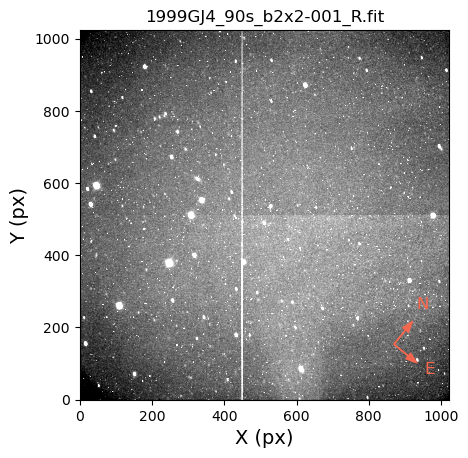

In [17]:
img.view(cardinal='NE', wcs=False, show=True);

# Trim and rebin image

## Trim

There are two methods from trimming the edge of an image:
- .trim
  to define the X and Y inner and outer limits for the trim

- .trim_border
  To remove a fixed number of pixels from all edges

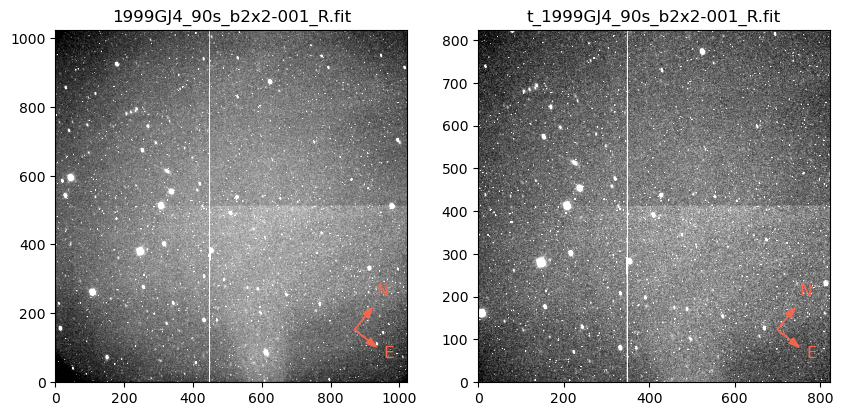

The new image label will include the prefix: image(t_1999GJ4_90s_b2x2-001_R.fit)


In [21]:
# Example of removing a number of pixels from the edges 
trim_img = img.trim_border(border=100, prefix='t_')

# Showing the image
fig, ax = plt.subplots(1,2, figsize=(10,7))
img.view(ax=ax[0], cardinal='NE')
trim_img.view(ax=ax[1], cardinal='NE', show=True)

# Showing new image label
print(f"The new image label will include the prefix: {trim_img}")

## Rebinning 

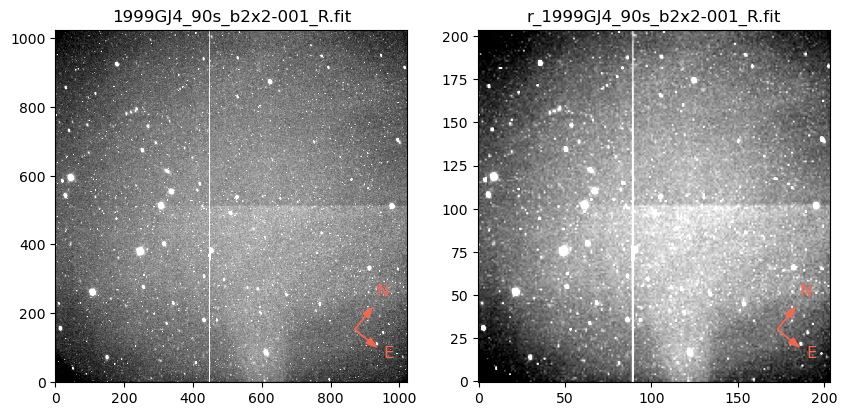

The new image label will include the prefix: image(r_1999GJ4_90s_b2x2-001_R.fit)


In [22]:
# Example of rebinning
bin_img = img.rebin(binsize=5, prefix='r_')

# Showing the image
fig, ax = plt.subplots(1,2, figsize=(10,7))
img.view(ax=ax[0], cardinal='NE')
bin_img.view(ax=ax[1], cardinal='NE', show=True)

# Showing new image label
print(f"The new image label will include the prefix: {bin_img}")

The metrics for the rebin can be changed by providing your own function.
The default is np.median.

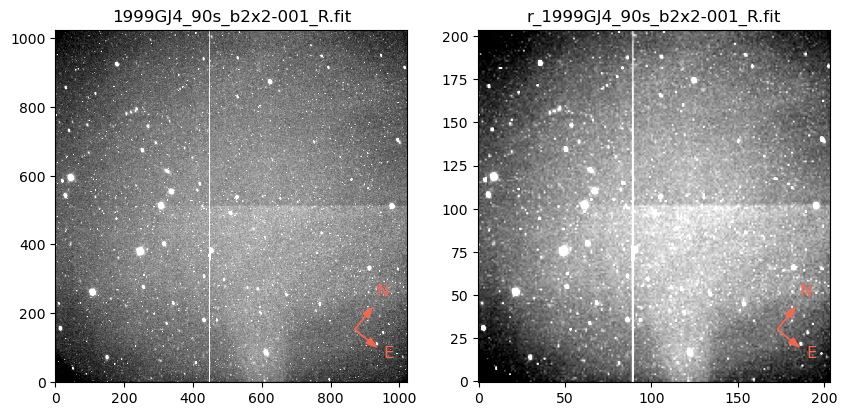

The new image label will include the prefix: image(r_1999GJ4_90s_b2x2-001_R.fit)


In [23]:
import numpy as np

# Example of rebinning with sum
bin_img = img.rebin(binsize=5, prefix='r_', func=np.sum)

# Showing the image
fig, ax = plt.subplots(1,2, figsize=(10,7))
img.view(ax=ax[0], cardinal='NE')
bin_img.view(ax=ax[1], cardinal='NE', show=True)

# Showing new image label
print(f"The new image label will include the prefix: {bin_img}")